<a href="https://colab.research.google.com/github/Manikanta-Korrapati/OIBSIP/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction with Machine Learning using Python**

---



# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
sales=pd.read_csv('/content/Advertising.csv')

In [ ]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# **Data Visualizaton**

<Axes: xlabel='TV', ylabel='Sales'>

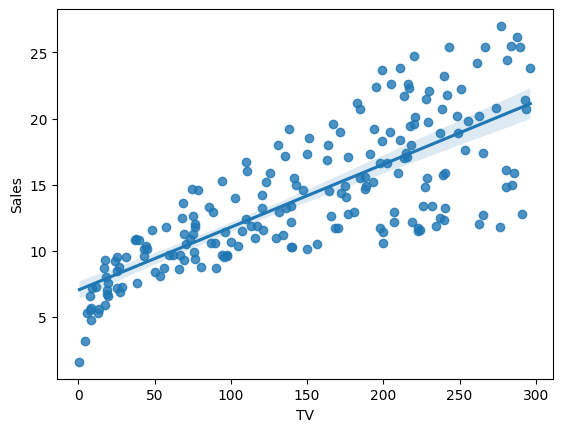

In [ ]:
sns.regplot(x='TV',y='Sales',data=sales)

<Axes: xlabel='Radio', ylabel='Sales'>

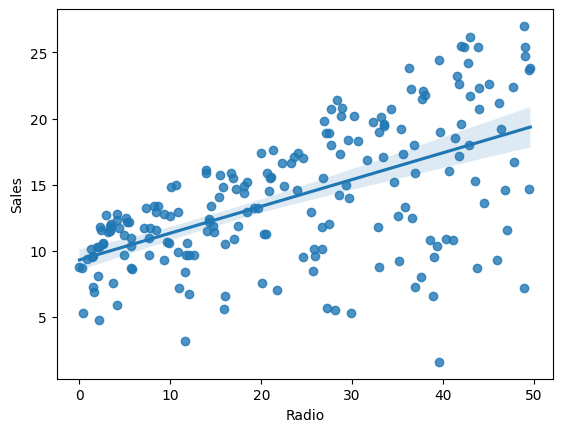

In [ ]:
sns.regplot(x='Radio',y='Sales',data=sales)

<Axes: xlabel='Newspaper', ylabel='Sales'>

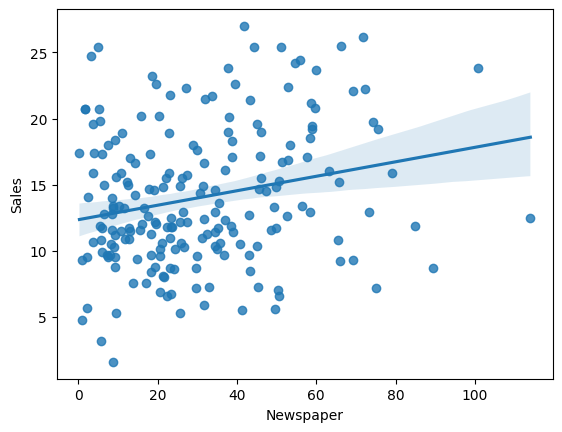

In [ ]:
sns.regplot(x='Newspaper',y='Sales',data=sales)

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y=sales['Sales']
x=sales[['Unnamed: 0', 'TV', 'Radio', 'Newspaper']]

In [ ]:
x.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper'], dtype='object')

In [ ]:
y.shape

(200,)

In [ ]:
x.shape

(200, 4)

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train.shape,x_test.shape

((150, 4), (50, 4))

In [ ]:
y_train.shape,y_test.shape

((150,), (50,))

# **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
salesmodel=LinearRegression()

In [ ]:
salesmodel.fit(x_train,y_train)

LinearRegression()

In [ ]:
salesmodel.coef_

array([-0.00421993,  0.04562403,  0.17934607, -0.00879344])

In [ ]:
salesmodel.intercept_

3.8140708535321295

# **Prediction**

In [ ]:
sales_pred=salesmodel.predict(x_test)

In [ ]:
sales_pred

array([ 9.53221827,  9.6664598 , 20.59396632, 15.21900277, 15.36384962,
       17.73628319, 20.98446455, 16.06152526, 10.58830177, 13.46519702,
       16.7266688 , 17.6018086 ,  9.50305243, 14.79312432, 18.1063722 ,
       17.58563442,  6.73469768,  9.77141635, 21.97988793,  7.33252729,
       18.16903192, 22.65107117, 22.52960587,  9.00685556,  8.43007273,
       12.14328229, 20.59275938, 11.61118133,  7.75782826, 17.44395275,
       19.70186104, 11.31569233, 22.68369446, 20.37715174, 22.86369027,
        9.86062984, 16.92931973, 13.80805603, 13.16743217, 23.18814543,
       14.81952082, 14.3423666 ,  6.86622925, 15.51966457, 16.36794992,
       14.96827002, 13.46436246, 23.23958812, 12.04201965,  9.94670075])

# **Data Visualization of Actual vs Predicted Data**

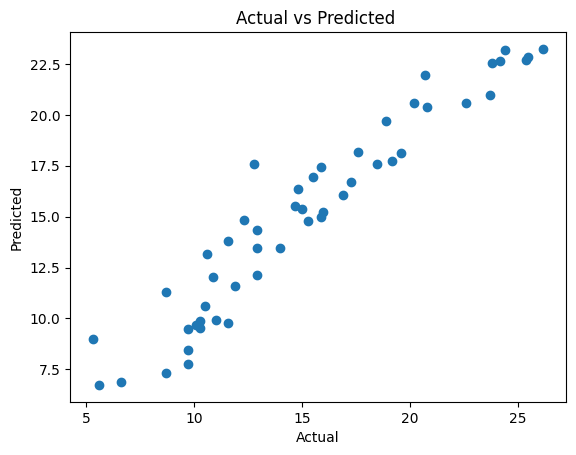

In [ ]:
plt.scatter(y_test,sales_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ")
plt.show()

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test,sales_pred)

1.3533223058199964

In [ ]:
r2_score(y_test,sales_pred)

0.908865944707766

In [ ]:
mean_absolute_percentage_error(y_test,sales_pred)

0.104721538237948

In [ ]:
mean_squared_error(y_test,sales_pred)

2.771545559229265

# **Future Predictions**

In [ ]:
sales_new=sales.sample(1)

In [ ]:
sales_new

,Unnamed: 0,TV,Radio,Newspaper,Sales
82,83,75.3,20.3,32.5,11.3


In [ ]:
sales_new1=sales_new.drop('Sales',axis=1)

In [ ]:
sales_new1

,Unnamed: 0,TV,Radio,Newspaper
82,83,75.3,20.3,32.5


In [ ]:
sales_newpred =salesmodel.predict(sales_new1)

In [ ]:
sales_newpred

array([10.254245])